In [3]:
#TASK 1 - Prediction using Supervised ML

# To Predict the percentage of marks of the students based on the number of hours they studied

In [7]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [11]:
# Reading data from remote link
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [12]:
stud_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
stud_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [14]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
stud_data.shape

(25, 2)

In [18]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
# checking null values in dataset
stud_data.isnull == True

False

In [20]:
stud_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [21]:
#check correlation between study and hours
stud_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


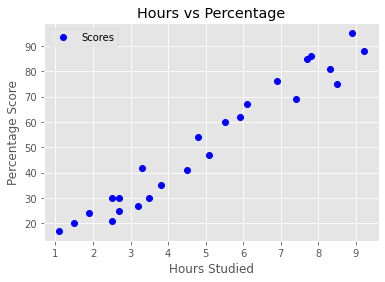

In [34]:
# Data Visulization
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o', color='b')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


# From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

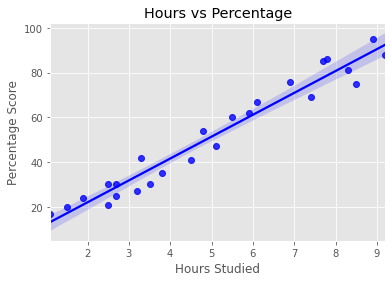

In [37]:
sns.regplot(x= stud_data['Hours'], y= stud_data['Scores'], color='b')
plt.title('Regression Plot',size=20)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# It is confirmed that the variables are positively correlated.

# Training the Model

# 1) Splitting the Data



In [40]:
# Defining X and y from the Data
X = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# 2) Fitting the Data into the model

In [41]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


# Predicting the Percentage of Marks

In [42]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Marks with the Actual Marks

In [43]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visually Comparing the Predicted Marks with the Actual Marks

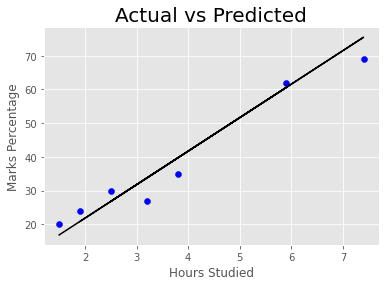

In [44]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the Model

In [45]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


# Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [46]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.